In [2]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
chap_2_file = "./data/pbp_py_chap_2.csv"

if os.path.isfile(chap_2_file):
    pbp_py = pd.read_csv(chap_2_file, low_memory=False)
else:
    seasons = range(2021, 2025 + 1)
    pbp_py = nfl.import_pbp_data(seasons)
    pbp_py.to_csv(chap_2_file)

2021 done.
2022 done.
2023 done.
2024 done.
2025 done.
Downcasting floats.


In [4]:
pbp_py_p = pbp_py.query("play_type == 'pass' & air_yards.notnull()").reset_index()

In [5]:
pbp_py_p["pass_length_air_yards"] = np.where(
    pbp_py_p["air_yards"] >= 20, "long", "short"
)

In [6]:
pbp_py_p["passing_yards"] = np.where(
    pbp_py_p["passing_yards"].isnull(), 0, pbp_py_p["passing_yards"]
)

In [7]:
pbp_py_p["passing_yards"].describe()

count    94297.000000
mean         7.092908
std          9.504713
min        -24.000000
25%          0.000000
50%          5.000000
75%         11.000000
max         98.000000
Name: passing_yards, dtype: float64

In [8]:
pbp_py_p.query('pass_length_air_yards == "short"')["passing_yards"].describe()

count    83376.000000
mean         6.450166
std          7.617451
min        -24.000000
25%          0.000000
50%          5.000000
75%         10.000000
max         86.000000
Name: passing_yards, dtype: float64

In [9]:
pbp_py_p.query('pass_length_air_yards == "long"')["passing_yards"].describe()

count    10921.000000
mean        11.999908
std         17.602066
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max         98.000000
Name: passing_yards, dtype: float64

In [10]:
pbp_py_p.query('pass_length_air_yards == "short"')["epa"].describe()

count    83376.000000
mean         0.109176
std          1.437508
min        -13.031219
25%         -0.617876
50%         -0.022762
75%          0.943678
max          8.137274
Name: epa, dtype: float64

In [11]:
pbp_py_p.query('pass_length_air_yards == "long"')["epa"].describe()

count    10921.000000
mean         0.365726
std          2.169597
min        -10.375507
25%         -0.853250
50%         -0.481221
75%          2.123010
max          8.882384
Name: epa, dtype: float64

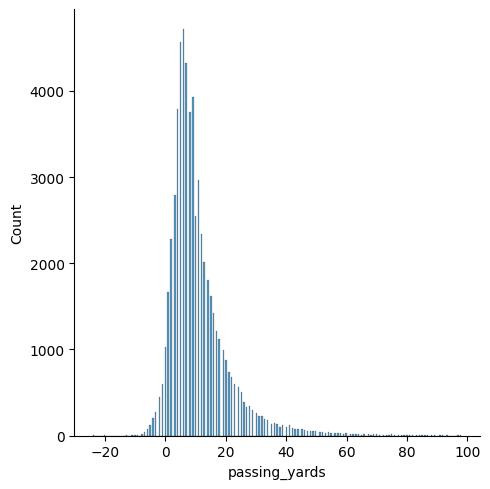

In [12]:
sns.displot(data=pbp_py, x="passing_yards")
plt.show()

In [13]:
sns.set_theme(style="whitegrid", palette="colorblind")

In [14]:
pbp_py_p_short = pbp_py_p.query('pass_length_air_yards == "short"')

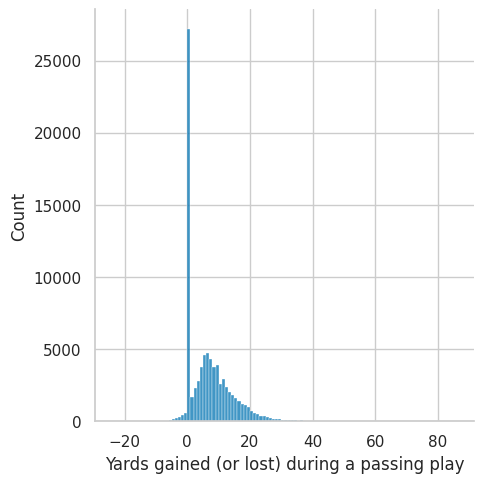

In [20]:
pbp_py_hist_short = sns.displot(data=pbp_py_p_short, binwidth=1, x="passing_yards")
pbp_py_hist_short.set_axis_labels(
    "Yards gained (or lost) during a passing play", "Count"
)
plt.show()

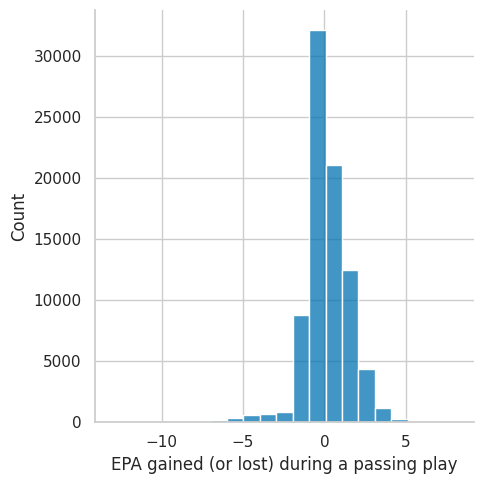

In [19]:
pbp_epa_hist_short = sns.displot(data=pbp_py_p_short, binwidth=1, x="epa")
pbp_epa_hist_short.set_axis_labels(
    "EPA gained (or lost) during a passing play", "Count"
)
plt.show()

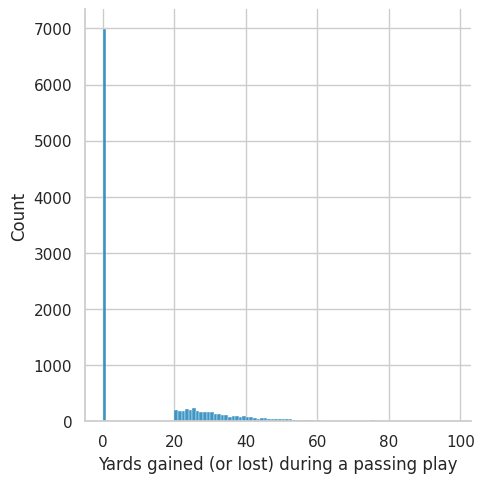

In [16]:
pbp_py_p_long = pbp_py_p.query('pass_length_air_yards == "long"')
pbp_py_hist_long = sns.displot(data=pbp_py_p_long, binwidth=1, x="passing_yards")
pbp_py_hist_long.set_axis_labels(
    "Yards gained (or lost) during a passing play", "Count"
)
plt.show()

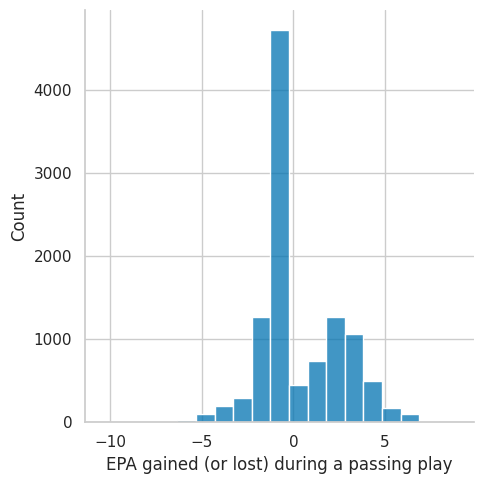

In [22]:
pbp_epa_hist_long = sns.displot(data=pbp_py_p_long, binwidth=1, x="epa")
pbp_epa_hist_long.set_axis_labels(
    "EPA gained (or lost) during a passing play", "Count"
)
plt.show()

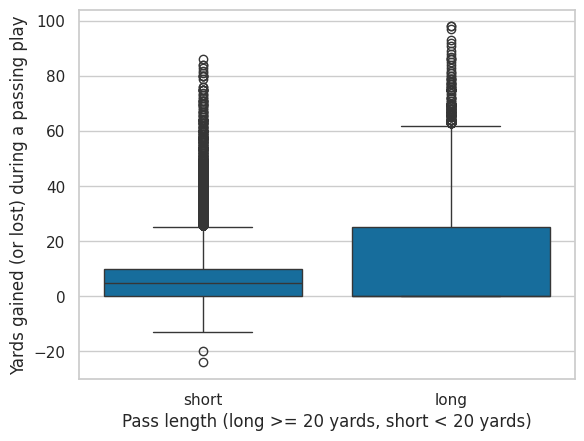

In [23]:
pass_boxplot = sns.boxplot(data=pbp_py_p, x="pass_length_air_yards", y="passing_yards")
pass_boxplot.set(
    xlabel="Pass length (long >= 20 yards, short < 20 yards)",
    ylabel="Yards gained (or lost) during a passing play",
)
plt.show()

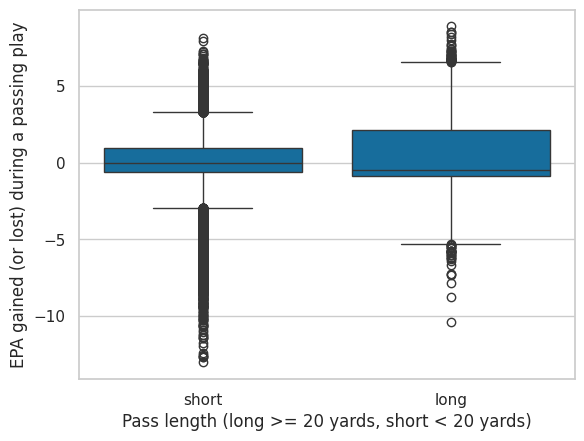

In [24]:
pass_boxplot_epa = sns.boxplot(data=pbp_py_p, x="pass_length_air_yards", y="epa")
pass_boxplot_epa.set(
    xlabel="Pass length (long >= 20 yards, short < 20 yards)",
    ylabel="EPA gained (or lost) during a passing play",
)
plt.show()